<a href="https://colab.research.google.com/github/Piyushmittal2192/Natural-Language-Processing/blob/master/Extractive_QA_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers

     |████████████████████████████████| 2.3MB 30.6MB/s 
     |████████████████████████████████| 901kB 42.3MB/s 
     |████████████████████████████████| 3.3MB 45.6MB/s 


In [ ]:
from transformers import AutoTokenizer, AutoModelForQuestionAnswering
import torch

**Load Tokenizer and Pretrained Model**

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-cased-distilled-squad")
model = AutoModelForQuestionAnswering.from_pretrained("distilbert-base-cased-distilled-squad")

In [ ]:
text = r"""
🤗 Transformers (formerly known as pytorch-transformers and pytorch-pretrained-bert) provides general-purpose
 architectures (BERT, GPT-2, RoBERTa, XLM, DistilBert, XLNet…) for Natural Language Understanding (NLU) and Natural
 Language Generation (NLG) with over 32+ pretrained models in 100+ languages and deep interoperability between
 TensorFlow 2.0 and PyTorch.
 """
questions = [
     "How many pretrained models are available in 🤗 Transformers?",
     "What does 🤗 Transformers provide?",
     "🤗 Transformers provides interoperability between which frameworks?",
 ]
for question in questions:
  inputs = tokenizer(question, text, add_special_tokens=True, return_tensors="pt")
  input_ids = inputs["input_ids"].tolist()[0]
  text_tokens = tokenizer.convert_ids_to_tokens(input_ids)
  outputs = model(**inputs)
  answer_start_scores = outputs.start_logits
  answer_end_scores = outputs.end_logits
  answer_start = torch.argmax(answer_start_scores)  # Get the most likely beginning of answer with the argmax of the score
  answer_end = torch.argmax(answer_end_scores) + 1  # Get the most likely end of answer with the argmax of the score
  answer = tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(input_ids[answer_start:answer_end]))

  print(f"Question: {question}")
  print(f"Answer: {answer}")

Question: How many pretrained models are available in 🤗 Transformers?
Answer: over 32 +
Question: What does 🤗 Transformers provide?
Answer: general - purpose architectures
Question: 🤗 Transformers provides interoperability between which frameworks?
Answer: TensorFlow 2. 0 and PyTorch


In [ ]:
text =r"""
Azimuth is measured with an antenna alignment tool. Azimuth tolerance for auditors is plus or minus 0.5 degrees. 
For construction, azimuth for this sector must match exactly what's on the RFDS. 
If you can't get access to site RFDS, please contact your employer's management team or Ericsson CM."""

questions = [
"what is Azimuth tolerance for auditors ?"
 ]

for question in questions:
  inputs = tokenizer(question, text, add_special_tokens=True, return_tensors="pt")
  input_ids = inputs["input_ids"].tolist()[0]

  text_tokens = tokenizer.convert_ids_to_tokens(input_ids)
  outputs = model(**inputs)
  answer_start_scores = outputs.start_logits
  answer_end_scores = outputs.end_logits

  answer_start = torch.argmax( answer_start_scores )  # Get the most likely beginning of answer with the argmax of the score
  answer_end = torch.argmax(answer_end_scores) + 1  # Get the most likely end of answer with the argmax of the score

  answer = tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(input_ids[answer_start:answer_end]))

  print(f"Question: {question}")
  print(f"Answer: {answer}")

Question: what is Azimuth tolerance for auditors ?
Answer: plus or minus 0. 5 degrees


In [ ]:
# text =[r"Jim Henson was a nice puppet"]
text =r"Jim Henson was a nice puppet"
questions = [
 "Who was Jim Henson?"
 ]

device = "cuda:0" if torch.cuda.is_available() else "cpu"
model     = model.to(device)
for question in questions:
  inputs = tokenizer(question, text, add_special_tokens=True, return_tensors="pt").to(device)
  input_ids = inputs["input_ids"].tolist()[0]

  text_tokens = tokenizer.convert_ids_to_tokens(input_ids)
  outputs = model(**inputs)
  answer_start_scores = outputs.start_logits
  answer_end_scores = outputs.end_logits

  answer_start = torch.argmax( answer_start_scores )  # Get the most likely beginning of answer with the argmax of the score
  answer_end = torch.argmax(answer_end_scores) + 1  # Get the most likely end of answer with the argmax of the score

  answer = tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(input_ids[answer_start:answer_end]))

  print(f"Question: {question}")
  print(f"Answer: {answer}")

Question: Who was Jim Henson?
Answer: a nice puppet


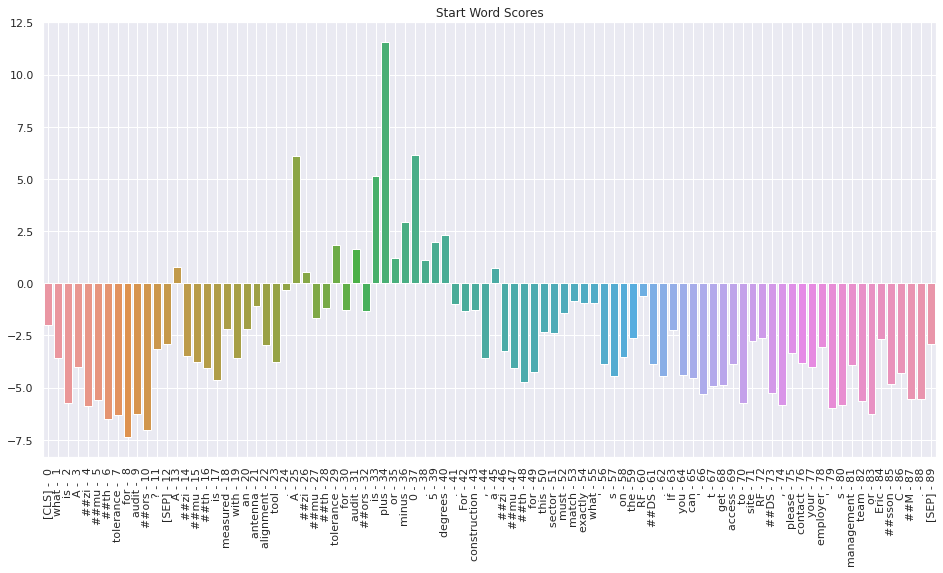

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
#sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (16,8)
# Pull the scores out of PyTorch Tensors and convert them to 1D numpy arrays.
s_scores = answer_start_scores.detach().numpy().flatten()
e_scores = answer_end_scores.detach().numpy().flatten()

# We'll use the tokens as the x-axis labels. In order to do that, they all need
# to be unique, so we'll add the token index to the end of each one.
token_labels = []
for (i, token) in enumerate(text_tokens):
    token_labels.append('{:} - {:>2}'.format(token, i))

# Create a barplot showing the start word score for all of the tokens.
ax = sns.barplot(x=token_labels, y=s_scores, ci=None)

# Turn the xlabels vertical.
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")

# Turn on the vertical grid to help align words to scores.
ax.grid(True)

plt.title('Start Word Scores')

plt.show()

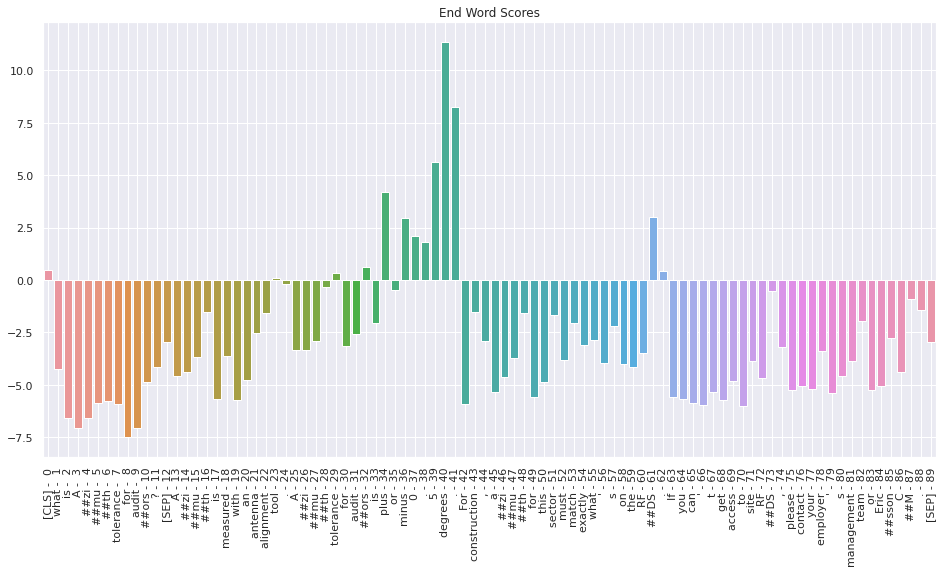

In [ ]:
# Create a barplot showing the start word score for all of the tokens.
ax = sns.barplot(x=token_labels, y=e_scores, ci=None)

# Turn the xlabels vertical.
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")

# Turn on the vertical grid to help align words to scores.
ax.grid(True)

plt.title('End Word Scores')

plt.show()

**Using Pipeline**

In [ ]:
from transformers import pipeline

In [ ]:
nlp = pipeline("question-answering")

In [ ]:
text =r"""
Azimuth is measured with an antenna alignment tool. Azimuth tolerance for auditors is plus or minus 0.5 degrees. 
For construction, azimuth for this sector must match exactly what's on the RFDS. 
If you can't get access to site RFDS, please contact your employer's management team or Ericsson CM."""

In [ ]:
result = nlp(question="what is Azimuth tolerance for auditors ?", context=text)
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

Answer: 'plus or minus 0.5 degrees', score: 0.9419, start: 87, end: 112
